## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'cell_images/Train'
valid_path = 'cell_images/Test'


In [3]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [4]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [5]:
  # useful for getting number of output classes
folders = glob('Dataset/Train/*')

In [6]:
folders

['Dataset/Train\\Parasite', 'Dataset/Train\\Uninfected']

In [7]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [9]:

# view the structure of the model
model.summary()


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [51]:
from tensorflow.keras.layers import MaxPooling2D

In [52]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 50176)            

In [53]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [54]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [55]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [56]:
training_set

In [57]:
test_set = test_datagen.flow_from_directory('Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [59]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/50
13/13 [==============================] - 17s 1s/step - loss: 0.1192 - accuracy: 0.9712 - val_loss: 0.3899 - val_accuracy: 0.8731
Epoch 2/50
13/13 [==============================] - 17s 1s/step - loss: 0.1577 - accuracy: 0.9567 - val_loss: 0.2514 - val_accuracy: 0.8955
Epoch 3/50
13/13 [==============================] - 17s 1s/step - loss: 0.0794 - accuracy: 0.9784 - val_loss: 0.2857 - val_accuracy: 0.8955
Epoch 4/50
13/13 [==============================] - 17s 1s/step - loss: 0.1132 - accuracy: 0.9615 - val_loss: 0.2592 - val_accuracy: 0.8955
Epoch 5/50
13/13 [==============================] - 17s 1s/step - loss: 0.0740 - accuracy: 0.9712 - val_loss: 0.2193 - val_accuracy: 0.8955
Epoch 6/50
13/13 [==============================] - 17s 1s/step - loss: 0.0825 - accuracy: 0.9808 - val_loss: 0.2570 - val_accuracy: 0.9030
Epoch 7/50
13/13 [==============================] - 17s 1s/step - loss: 0.0521 - accuracy: 0.9928 - val_loss: 0.3435 - val_accuracy: 0.8881
Epoch 8/50
13/13 [==

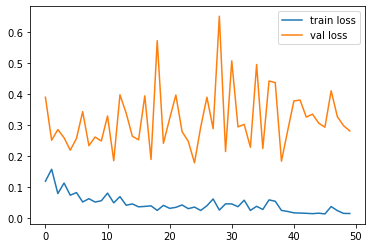

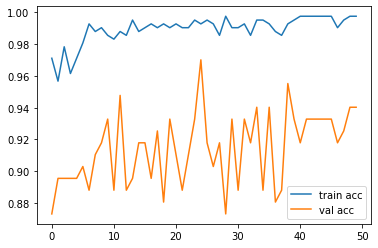

<Figure size 432x288 with 0 Axes>

In [60]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [62]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg19.h5')

In [84]:

y_pred = model.predict(test_set)


In [85]:
y_pred

array([[0.2843373 , 0.7156627 ],
       [0.22336747, 0.7766325 ],
       [0.14467525, 0.8553248 ],
       [0.21251036, 0.78748965],
       [0.23970032, 0.7602996 ],
       [0.15653664, 0.8434633 ],
       [0.39952135, 0.6004786 ],
       [0.6927196 , 0.30728045],
       [0.95973086, 0.04026916],
       [0.4049119 , 0.59508806],
       [0.33628508, 0.66371495],
       [0.22428255, 0.7757174 ],
       [0.66732204, 0.33267796],
       [0.28769094, 0.7123091 ],
       [0.07830311, 0.9216969 ],
       [0.8018348 , 0.19816525],
       [0.20560604, 0.79439396],
       [0.82987213, 0.17012782],
       [0.39092284, 0.60907716],
       [0.10765789, 0.8923421 ],
       [0.95939034, 0.04060962],
       [0.3492165 , 0.6507835 ],
       [0.42357075, 0.57642925],
       [0.9909774 , 0.00902253],
       [0.28563592, 0.71436405],
       [0.42359748, 0.5764025 ],
       [0.2872902 , 0.7127097 ],
       [0.19691862, 0.80308145],
       [0.8587813 , 0.14121872],
       [0.20452158, 0.7954784 ],
       [0.

In [73]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [74]:
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0], dtype=int64)

In [5]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
model=load_model('C:\\Users\\HP\\OneDrive\\Desktop\\Malaria-Detection-master\\model_vgg19.h5')
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('vv/t',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

result=model.predict(test_set)
print(result)
import numpy as np
a=np.argmax(model.predict(test_set), axis=1)
print(a)
'''if(a==1):
    print("Uninfected")
else:
    print("Infected")'''

Found 11 images belonging to 1 classes.
[[1.0000000e+00 8.6771537e-16]
 [1.0000000e+00 5.6112248e-16]
 [1.0000000e+00 3.1787412e-10]
 [1.0000000e+00 3.2683457e-38]
 [1.0000000e+00 9.6275697e-27]
 [1.0000000e+00 2.1598815e-16]
 [1.0000000e+00 5.0764686e-09]
 [1.0000000e+00 8.8682871e-19]
 [1.0000000e+00 2.5419518e-33]
 [1.0000000e+00 9.3846960e-34]
 [1.0000000e+00 0.0000000e+00]]
[0 0 0 0 0 0 0 0 0 0 0]


'if(a==1):\n    print("Uninfected")\nelse:\n    print("Infected")'

In [24]:
img=image.load_img('Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [40]:
img=image.load_img('Dataset/Test/Parasite/1.png',target_size=(224,224))

In [41]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [42]:
x.shape

(224, 224, 3)

In [43]:
x=x/255

In [44]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [45]:
model.predict(img_data)

array([[0.02571126, 0.9742888 ]], dtype=float32)

In [38]:
a=np.argmax(model.predict(img_data), axis=1)

In [86]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_settt = test_datagen.flow_from_directory('vv/',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1 images belonging to 1 classes.


In [90]:
result=model.predict(test_settt)

InvalidArgumentError:  Input to reshape is a tensor with 2048 values, but the requested shape requires a multiple of 25088
	 [[node model_1/flatten_1/Reshape (defined at <ipython-input-78-f647074c5418>:1) ]] [Op:__inference_predict_function_7025]

Function call stack:
predict_function


In [39]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Uninfected


In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('C:\\Users\\HP\\OneDrive\\Desktop\\Malaria-Detection-master\\malaria3.h5')

In [19]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('vv/t',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1 images belonging to 1 classes.


In [21]:
result=model.predict(test_set)
result
import numpy as np
a=np.argmax(model.predict(test_set), axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")

array([[9.9999988e-01, 1.4538112e-07]], dtype=float32)

In [24]:
import numpy as np
a=np.argmax(model.predict(test_set), axis=1)
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Jun 11 22:34:20 2020
@author: Krish Naik
"""

from __future__ import division, print_function
# coding=utf-8
import sys
import os
import glob
import re
import numpy as np

# Keras
from tensorflow.keras.applications.imagenet_utils import preprocess_input, decode_predictions
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

# Flask utils
from flask import Flask, redirect, url_for, request, render_template
from werkzeug.utils import secure_filename
#from gevent.pywsgi import WSGIServer

# Define a flask app
app = Flask(__name__)

# Model saved with Keras model.save()
MODEL_PATH ='model_vgg19.h5'

# Load your trained model
model = load_model(MODEL_PATH)





def model_predict(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))

    # Preprocessing the image
    x = image.img_to_array(img)
    # x = np.true_divide(x, 255)
    ## Scaling
    x=x/255
    x = np.expand_dims(x, axis=0)
   

    # Be careful how your trained model deals with the input
    # otherwise, it won't make correct prediction!
    x = preprocess_input(x)

    preds = model.predict(x)
    preds=np.argmax(preds, axis=1)
    if preds==0:
        preds="The Person is Infected With Pneumonia"
    else:
        preds="The Person is not Infected With Pneumonia"
    
    
    return preds


@app.route('/', methods=['GET'])
def index():
    # Main page
    return render_template('index.html')


@app.route('/predict', methods=['GET', 'POST'])
def upload():
    if request.method == 'POST':
        # Get the file from post request
        f = request.files['file']

        # Save the file to ./uploads
        basepath = os.path.dirname(__file__)
        file_path = os.path.join(
            basepath, 'uploads', secure_filename(f.filename))
        f.save(file_path)

        # Make prediction
        preds = model_predict(file_path, model)
        result=preds
        return result
    return None


if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Restarting with windowsapi reloader


SystemExit: 1

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18161678010156824940]